In [179]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [180]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM
from tensorflow.keras import regularizers

In [181]:
with open('dataset.txt', 'r') as file:
  data = file.read()
corpus = data.lower().split('\n')

In [86]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

In [87]:
total_words = len(tokenizer.word_index) + 1
embedding_dim = 100

In [88]:
# Creating n_grams and adding them to input_seq array
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(len(token_list)):
    n_gram_seq = token_list[:i+1]
    input_sequences.append(n_gram_seq)

In [89]:
# Adding padding
max_seq_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre'))

In [90]:
max_seq_len

364

In [91]:
#Defining train X and Y
train_X = input_sequences[:, :-1]
train_y = input_sequences[:, -1]
train_y = tf.keras.utils.to_categorical(train_y, num_classes=total_words)

In [92]:
train_X.shape

(15146, 363)

In [93]:
train_y.shape

(15146, 4011)

In [97]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, embedding_dim, input_length=max_seq_len-1),
    tf.keras.layers.Bidirectional(LSTM(150, return_sequences='True')),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Bidirectional(LSTM(embedding_dim)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(total_words/2, activation='relu'),
    tf.keras.layers.Dense(total_words, activation='softmax')
])

In [98]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [100]:
history = model.fit(train_X, train_y, epochs=110, verbose=1)

Epoch 1/110
474/474 [==============================] - 37s 77ms/step - loss: 6.4911 - accuracy: 0.0500
Epoch 2/110
474/474 [==============================] - 36s 77ms/step - loss: 6.3246 - accuracy: 0.0508
Epoch 3/110
474/474 [==============================] - 36s 76ms/step - loss: 6.1465 - accuracy: 0.0586
Epoch 4/110
474/474 [==============================] - 36s 76ms/step - loss: 5.9670 - accuracy: 0.0633
Epoch 5/110
474/474 [==============================] - 36s 76ms/step - loss: 5.7879 - accuracy: 0.0707
Epoch 6/110
474/474 [==============================] - 36s 76ms/step - loss: 5.6134 - accuracy: 0.0785
Epoch 7/110
474/474 [==============================] - 36s 76ms/step - loss: 5.4346 - accuracy: 0.0835
Epoch 8/110
474/474 [==============================] - 36s 76ms/step - loss: 5.2539 - accuracy: 0.0955
Epoch 9/110
474/474 [==============================] - 36s 76ms/step - loss: 5.0607 - accuracy: 0.1059
Epoch 10/110
474/474 [==============================] - 36s 76ms/step - l

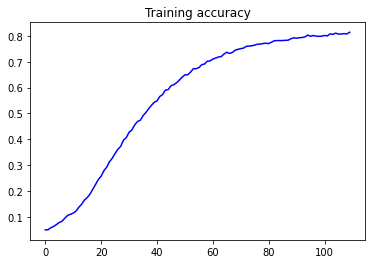

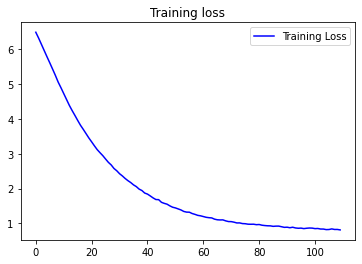

In [101]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [224]:
seed_text = "Кек"
next_words = 11
  
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Кек я не минздрав предупреждать не буду потому что я попугай нужно


In [219]:
model.save('quote_mode.h5')